In [1]:
import pandas as pd
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [3]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
# change value of string 'ham' & 'spam' into 1 and 0
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.25)

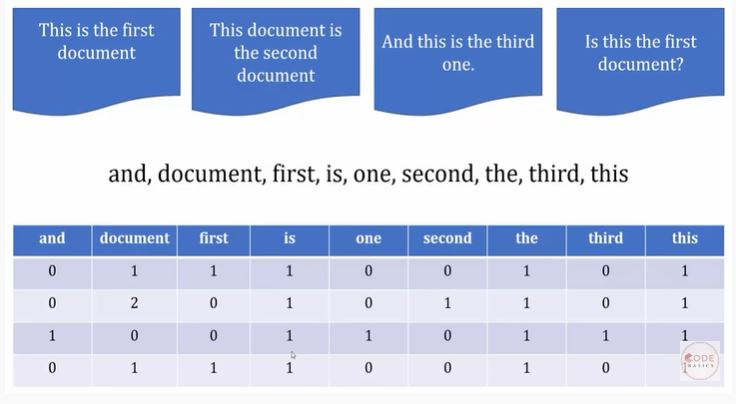

In [8]:
from IPython.display import display, Image
display(Image(filename='feature.jpg'))

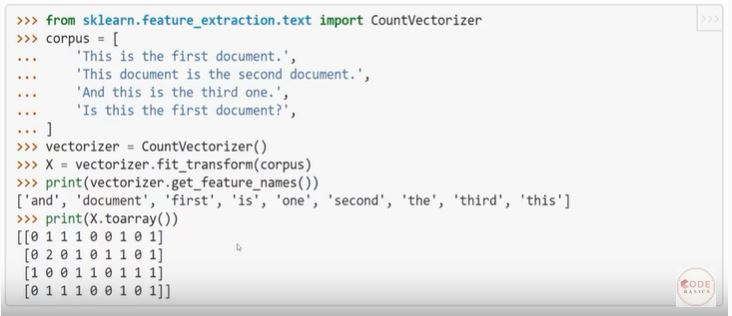

In [9]:
from IPython.display import display, Image
display(Image(filename='feature2.jpg'))

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.values)
#emial is converted into number matrix
#direct string cant be trained 
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Training

In [13]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
emails=[
    'hello sangam,can we play football together',
    'Upto 50% discount on sale day'
    ]
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [17]:
X_test_count=v.transform(X_test)
model.score(X_test_count,y_test)

0.9870782483847811

In [23]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
        ('vectorizer',CountVectorizer()),
        ('nb',MultinomialNB())
    ])
#Now we can train classifier even with string value
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [24]:
clf.score(X_test,y_test)

0.9870782483847811

In [25]:
clf.predict(emails)

array([0, 1], dtype=int64)